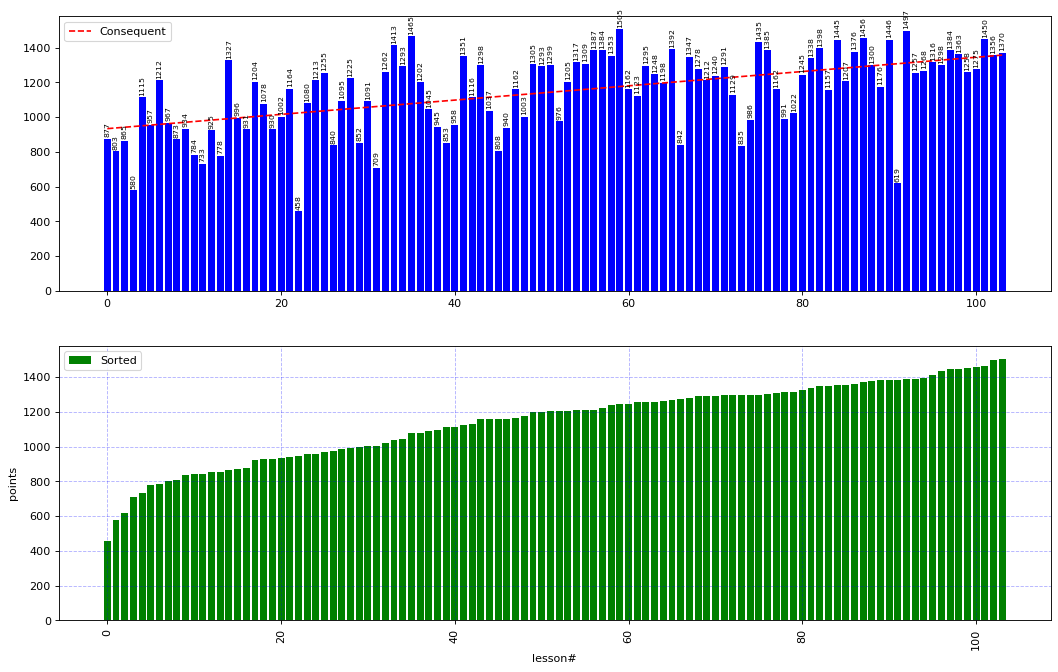

'\n\n# list for unique learned words\nnew_learned_words = list()\n\n# determination quantity of unique words learned up to date\nfor i in range(len(data_words_lesson_df)):\n    temp = data_words_lesson_df.loc[i, \'list_of_words\'].split(";")\n    for cw in temp:\n        if cw.strip() not in new_learned_words:\n            new_learned_words.append(cw.strip())\n    data_words_lesson_df.loc[i, \'total_words\'] = len(new_learned_words)\n\n# extraction necessary information only - date and quantity of unique words, keeping only final number per day\ndata_words_lesson_df = data_words_lesson_df.loc[:, [\'date\', \'total_words\']]\nmask = data_words_lesson_df.duplicated(subset=\'date\', keep=\'last\')\ndf = data_words_lesson_df[~mask]\ndf = df.reset_index()\n\n# plotting results on a graph\nplt.figure(figsize=(16, 10), dpi=80)\nplt.get_current_fig_manager().set_window_title(\'Words per Date\')\nplt.bar(df[\'date\'], df[\'total_words\'], color=\'orange\')\nplt.grid(linestyle=\'--\', color=\'bl

In [52]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# import data from existing leaning file with lesson sheet
lesson_df = pd.read_excel('dutch.xlsx', sheet_name='lesson')

# extraction necessary information only - date of lesson finish and points
data_words_lesson_df = lesson_df.loc[:, ['finish', 'points', 'known', 'r']]
data_words_lesson_df['date'] = data_words_lesson_df['finish'].apply(lambda x: x.strftime("%d.%m.%Y"))
conseq = data_words_lesson_df[data_words_lesson_df['known'] != 25]
conseq = conseq.reset_index()
sort = conseq.sort_values(by = 'points', ascending=True)

# plotting results on a graph
plt.figure(figsize=(16, 10), dpi=80)
plt.get_current_fig_manager().set_window_title('Points graphs')




# create the first subplot
ax = plt.subplot(2, 1, 1)

# plot the first bar graph
bar = ax.bar(range(len(conseq)), conseq['points'], color='blue')


for i in range(len(conseq)):
    plt.text(x=i, y=conseq.loc[i, 'points'] + 10, s=conseq.loc[i, 'points'], ha='center', va='bottom', color = 'black', size = 7, rotation=90)

        
x = np.array(range(len(conseq)))
y = np.poly1d(np.polyfit(x, conseq['points'], 1))(x)
ax.plot(x, y, color='red', linestyle='--')

plt.legend(['Consequent'])


# create the second subplot
plt.subplot(2, 1, 2)

# plot the second bar graph
plt.bar(range(len(sort)), sort['points'], color='green')
plt.legend(['Sorted'])

plt.grid(linestyle='--', color='blue', alpha=.3)
plt.xticks(rotation=90)
plt.xlabel('lesson#')
plt.ylabel('points')

# show the plot
current_time = datetime.now().strftime("%d_%m_%Y")
plt.savefig(f'graph_{current_time}.png', dpi=300, bbox_inches='tight')
plt.show()



"""

# list for unique learned words
new_learned_words = list()

# determination quantity of unique words learned up to date
for i in range(len(data_words_lesson_df)):
    temp = data_words_lesson_df.loc[i, 'list_of_words'].split(";")
    for cw in temp:
        if cw.strip() not in new_learned_words:
            new_learned_words.append(cw.strip())
    data_words_lesson_df.loc[i, 'total_words'] = len(new_learned_words)

# extraction necessary information only - date and quantity of unique words, keeping only final number per day
data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'total_words']]
mask = data_words_lesson_df.duplicated(subset='date', keep='last')
df = data_words_lesson_df[~mask]
df = df.reset_index()

# plotting results on a graph
plt.figure(figsize=(16, 10), dpi=80)
plt.get_current_fig_manager().set_window_title('Words per Date')
plt.bar(df['date'], df['total_words'], color='orange')
plt.grid(linestyle='--', color='blue', alpha=.3)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Words Total')

# addition values to bars, I add quantity of new words learned day by day
for i in range(len(df)):
    if i == 0:
        plt.text(x=i, y=df.loc[i, 'total_words'], s=df.loc[i, 'total_words'], ha='center', va='bottom', color = 'black', size = 8)
    else:
        plt.text(x=i, y=df.loc[i, 'total_words'], s=df.loc[i, 'total_words'] - df.loc[i - 1, 'total_words'],
                 ha='center', va='bottom', color='black', size=8)

current_time = datetime.now().strftime("%d_%m_%Y")

plt.savefig(f'graph_{current_time}.png', dpi=300, bbox_inches='tight')
plt.show()

"""

In [13]:
lesson_df

,Unnamed: 0,lesson,start,inter,finish,known,points,length,time,list_of_words,r
0,0,1,2022-11-26 21:14:16.069,2022-11-26 21:24:14.423,2022-11-26 21:31:48.654,6,877,184,1052,krapte; argument; jouw; achterwerk; broedstoof...,1
1,1,2,2022-11-27 02:30:31.842,2022-11-27 02:41:47.490,2022-11-27 02:49:34.282,8,803,185,1142,aanranden; fiks; middel; kroeshaar; plezant; a...,2
2,2,3,2022-11-27 13:24:02.594,2022-11-27 13:35:42.708,2022-11-27 13:42:12.905,8,865,204,1090,reis; betekenis; naast zitten; gewoon; voortaa...,3
3,3,4,2022-11-27 22:23:03.719,2022-11-27 22:34:28.615,2022-11-27 22:45:14.736,7,580,217,1331,recept; opzichtig; bloed; militair; verzuimen;...,4
4,4,5,2022-11-28 17:44:21.460,2022-11-28 17:52:57.397,2022-11-28 17:58:23.277,5,1115,191,841,Romeins; storten; half; alsnog; zuchten; rein;...,5
...,...,...,...,...,...,...,...,...,...,...,...
125,125,126,2023-01-18 20:16:05.869,2023-01-18 20:21:26.886,2023-01-18 20:27:49.923,12,1258,224,704,experiment; teleurstelling; vocht; kabouter; f...,100
126,126,127,2023-01-18 20:33:56.437,2023-01-18 20:39:47.719,2023-01-18 20:45:13.699,5,1275,225,677,het aan zijn water voelen; afwezigheid; toegan...,101
127,127,128,2023-01-19 20:54:06.259,2023-01-19 20:59:02.581,2023-01-19 21:02:48.158,11,1450,183,521,verschieten; erg; geluksvogel; Spaans; kwal; g...,102
128,128,129,2023-01-20 19:16:35.041,2023-01-20 19:21:52.401,2023-01-20 19:26:36.078,13,1356,205,601,ondergronds; verkouden zijn; industrieel; krui...,103


In [16]:
sort

,finish,points,known,date
75,2022-12-27 13:13:42.698,1505,15,27.12.2022
116,2023-01-14 13:35:21.312,1497,10,14.01.2023
42,2022-12-14 19:38:26.184,1465,19,14.12.2022
111,2023-01-11 17:05:49.867,1456,13,11.01.2023
127,2023-01-19 21:02:48.158,1450,11,19.01.2023
...,...,...,...,...
11,2022-12-01 20:07:38.151,733,4,01.12.2022
37,2022-12-12 20:11:35.058,709,7,12.12.2022
115,2023-01-14 13:22:19.822,619,12,14.01.2023
3,2022-11-27 22:45:14.736,580,7,27.11.2022
